In [146]:
# 1. Data Source and Contents
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
census_data = pd.read_csv('census_data.csv')

In [ ]:
# 2. Data Quality Analysis (DQA)
census_data.isnull().sum() # identify null values
census_data.describe() # display descriptive statistics
census_data.info() # identify data types
census_data_train = census_data[census_data['flag'] == 'train']
census_data_test = census_data[census_data['flag'] == 'test']

In [148]:
# 3. Exploratory Data Analysis (EDA)
def bar(column):
  x = census_data.pivot_table(values = ['flag'], index = [column], columns = ['y'], aggfunc = 'count')
  x = x.apply(lambda c: c / c.sum() * 100, axis = 1)
  x.plot(kind = 'bar', stacked = True)
  plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
  return plt.show()

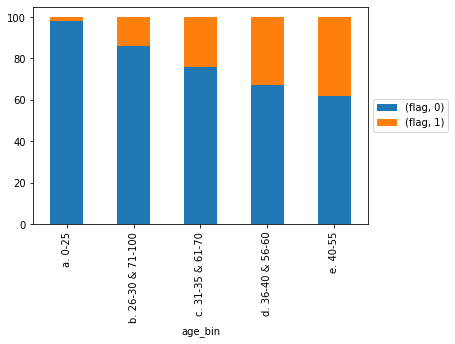

In [149]:
# Variable 1: Age
bar('age_bin')

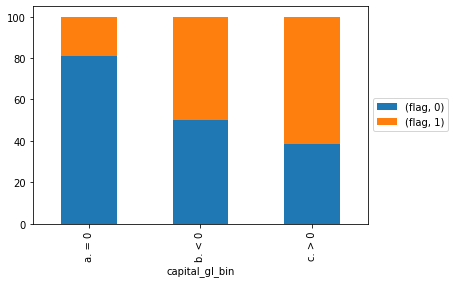

In [150]:
# Variable 2: Capital Gain/Loss
bar('capital_gl_bin')

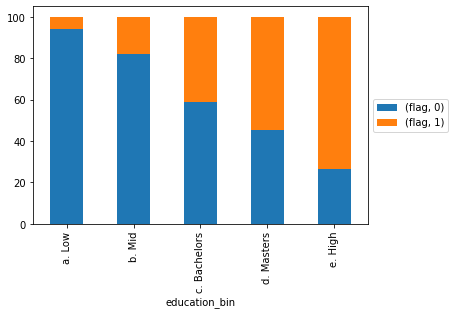

In [151]:
# Variable 3: Education
bar('education_bin')

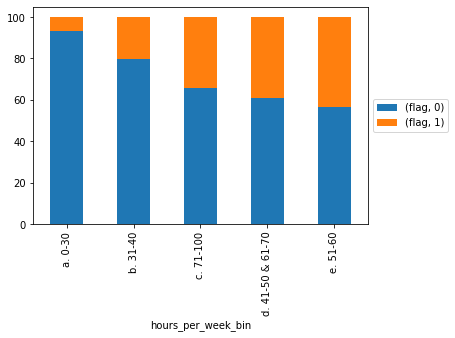

In [152]:
# Variable 4: Hours per Week
bar('hours_per_week_bin')

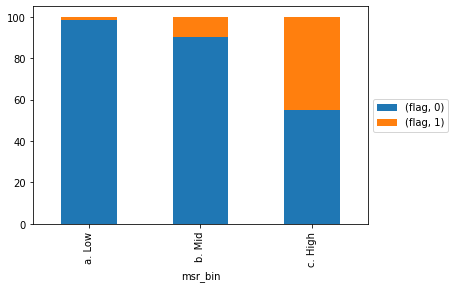

In [153]:
# Variable 5: Marriage Status and Relationship
bar('msr_bin')

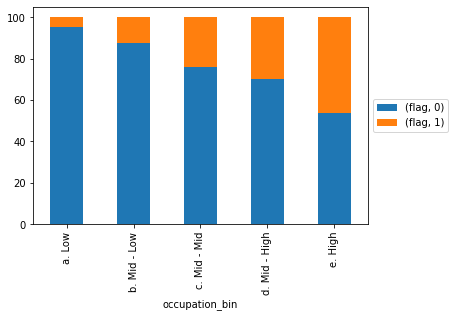

In [154]:
# Variable 6: Occupation
bar('occupation_bin')

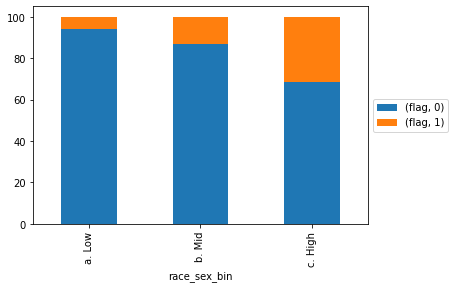

In [155]:
# Variable 7: Race and Sex
bar('race_sex_bin')

In [156]:
# 4. Build Decision Tree Classifier Models
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() # used to encode data
train = census_data_train.apply(label_encoder.fit_transform)
test = census_data_test.apply(label_encoder.fit_transform)
# Create variables
features = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin']
x_train = train[features]
y_train = train.y
x_test = test[features]
y_test = test.y
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features = None, min_samples_leaf = 15)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


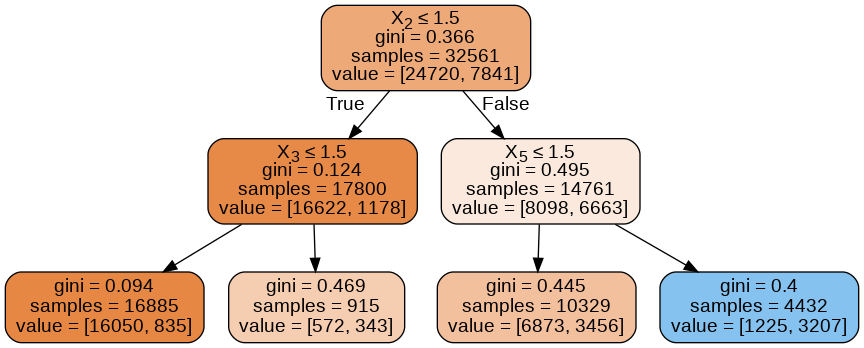

In [177]:
# 5. Visualize Your Decision Tree using GraphViz
from sklearn.externals.six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus 
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [158]:
# 6. Evaluate Decision Tree Performance
from sklearn import metrics
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[11607   828]
 [ 1715  2131]]


In [159]:
# Accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve
print(metrics.accuracy_score(y_test, y_pred)) # Accuracy
print(metrics.precision_score(y_test, y_pred)) # Precision
print(metrics.recall_score(y_test, y_pred)) # Recall
print(metrics.f1_score(y_test, y_pred)) # F1 Score
# print(metrics.auc(x_test, y_pred)) # AUC Value
print(metrics.roc_curve(y_test, y_pred)) # ROC Curve

0.8438056630428107
0.7201757350456235
0.5540821632865315
0.6263041880969876
(array([0.        , 0.06658625, 1.        ]), array([0.        , 0.55408216, 1.        ]), array([2, 1, 0]))


In [169]:
# 7. Tune Decision Tree Performance
from sklearn.tree import DecisionTreeClassifier
# Enthropy 1
dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 1.0, min_samples_leaf=1, max_depth=1)
dtree.fit(x_train, y_train)
y_pred1_enthropy = dtree.predict(x_test)
# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred1_enthropy)) # accuracy
print(metrics.precision_score(y_test, y_pred1_enthropy)) # precision
print(metrics.recall_score(y_test, y_pred1_enthropy)) # recall
print(metrics.f1_score(y_test, y_pred1_enthropy)) # f1 score

0.7637737239727289
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
# Enthropy 2
dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 0.5, min_samples_leaf=1, max_depth=1)
dtree.fit(x_train, y_train)
y_pred2_enthropy = dtree.predict(x_test)
# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred2_enthropy)) # accuracy
print(metrics.precision_score(y_test, y_pred2_enthropy)) # precision
print(metrics.recall_score(y_test, y_pred2_enthropy)) # recall
print(metrics.f1_score(y_test, y_pred2_enthropy)) # f1 score

0.7637737239727289
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
# Enthropy 3
dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 1.0, min_samples_leaf=2, max_depth=1)
dtree.fit(x_train, y_train)
y_pred3_enthropy = dtree.predict(x_test)
# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred3_enthropy)) # accuracy
print(metrics.precision_score(y_test, y_pred3_enthropy)) # precision 
print(metrics.recall_score(y_test, y_pred3_enthropy)) # precision
print(metrics.f1_score(y_test, y_pred3_enthropy)) # f1 score

0.7637737239727289
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
# Enthropy 4
dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 0.2, min_samples_leaf=1, max_depth=2)
dtree.fit(x_train, y_train)
y_pred4_enthropy = dtree.predict(x_test)
# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred4_enthropy)) # accuracy
print(metrics.precision_score(y_test, y_pred4_enthropy)) # precision
print(metrics.recall_score(y_test, y_pred4_enthropy)) # recall
print(metrics.f1_score(y_test, y_pred4_enthropy)) # f1 score

0.8217554204287206
0.7159194876486734
0.40691627665106606
0.5188992042440318


In [173]:
# Gini 1
dtree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 1.0, min_samples_leaf=1, max_depth=1)
dtree.fit(x_train, y_train)
y_pred1_gini = dtree.predict(x_test)
# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred1_gini)) # accuracy
print(metrics.precision_score(y_test, y_pred1_gini)) # precision
print(metrics.recall_score(y_test, y_pred1_gini)) # recall
print(metrics.f1_score(y_test, y_pred1_gini)) # f1 score

0.7637737239727289
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
# Gini 2
dtree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 1.0, min_samples_leaf=2, max_depth=2)
dtree.fit(x_train, y_train)
y_pred2_gini = dtree.predict(x_test)
# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred2_gini)) # accuracy
print(metrics.precision_score(y_test, y_pred2_gini)) # precision
print(metrics.recall_score(y_test, y_pred2_gini)) # recall
print(metrics.f1_score(y_test, y_pred2_gini)) # f1 score

0.7637737239727289
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
# Gini 3
dtree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.2, min_samples_leaf=1, max_depth=1)
dtree.fit(x_train, y_train)
y_pred3_gini = dtree.predict(x_test)
# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred3_gini)) # accuracy
print(metrics.precision_score(y_test, y_pred3_gini)) # precision
print(metrics.recall_score(y_test, y_pred3_gini)) # recall
print(metrics.f1_score(y_test, y_pred3_gini)) # f1 score

0.7637737239727289
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
# Gini 4
dtree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.4, min_samples_leaf=1, max_depth=2)
dtree.fit(x_train, y_train)
y_pred4_gini = dtree.predict(x_test)
# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred4_gini)) # accuracy
print(metrics.precision_score(y_test, y_pred4_gini)) # precision
print(metrics.recall_score(y_test, y_pred4_gini)) # recall
print(metrics.f1_score(y_test, y_pred4_gini)) # f1 score

0.8217554204287206
0.7159194876486734
0.40691627665106606
0.5188992042440318


In [ ]:
# 8. Conclusion

# 8.1 How long was your total run time to train the model?
# CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs, Wall time: 5.48 µs

# 8.2 Did you find the BEST TREE?
# I am not sure if the models executed properly, as many of the scores were the same. However, the fourth entropy and gini models both had scores in each performance category, although they were exactly the same.

# 8.3 Draw the Graph of the BEST TREE Using GraphViz
# The graphs are displayed in section 5 of this notebook.

# 8.4 What makes it the best tree?
# The best tree is the original model (created in section 4), as it is the only one that executed properly.

In [143]:
# 9 Automation of Performance Tuning
hyperparameter_variations = pd.read_csv('hyperparameter_variations.csv')

In [144]:
# 10. Prediction using your "trained" Decision Tree Model
# I am not sure if the decision tree models executed properly, as some of the performance scores seemed off.
# Various performance scores were 0, except for the Entropy 4 and Gini 4 models, which received performance scores in each category. However, the scores were exactly the same despite different varying the hyperparameters.